# Visualizations of the data from the nginx log file

In [2]:
import re
from urllib.parse import urlparse, parse_qs
from Classes import LogParser, LogEntry
import datetime
import matplotlib.pyplot as plt

### Extracting the data from the txt file and storing the required data

In [3]:
filename = 'log.txt'
time_stamps = []
request_methods = []
url_paths = []

log_parser = LogParser(filename)
for entry in log_parser.parse_log_entries():
    if (entry != None):
        time_stamps.append(entry.get_date_time())
        request_methods.append(entry.get_request_method())
        url_paths.append(entry.get_url_path())

### Now let's create a graph showing the distribution of the request times through the 24hrs of the day

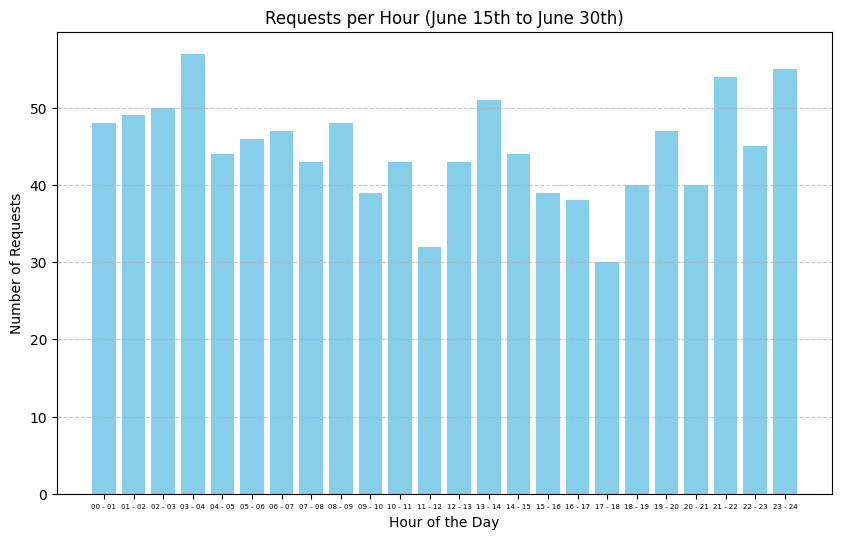

In [4]:
datetime_objects = [datetime.datetime.strptime(ts, '%d/%b/%Y:%H:%M:%S %z') for ts in time_stamps]

# Filter data within the specified date range (June 15th to June 30th)
start_date = datetime.datetime(2024, 6, 15, tzinfo=datetime.timezone.utc)
end_date = datetime.datetime(2024, 6, 30, tzinfo=datetime.timezone.utc)
filtered_data = [dt for dt in datetime_objects if start_date <= dt <= end_date]

# Count requests per hour
hourly_counts = {}
for dt in filtered_data:
    hour = dt.hour
    hourly_counts[hour] = hourly_counts.get(hour, 0) + 1

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.keys(), hourly_counts.values(), color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.title('Requests per Hour (June 15th to June 30th)')
plt.xticks(range(24), [f"{h:02} - {h+1:02}" for h in range(24)], fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### This time let's see that what url endpoints been requested the most in each hour

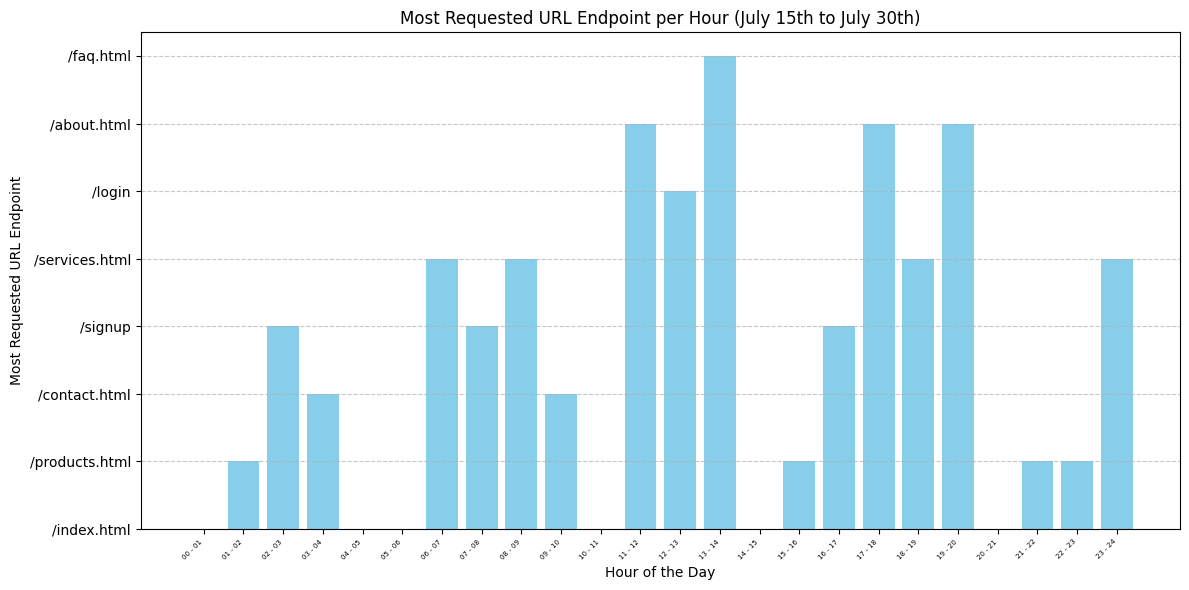

In [6]:
datetime_objects = [datetime.datetime.strptime(ts, '%d/%b/%Y:%H:%M:%S %z') for ts in time_stamps]

# Filter data within the specified date range (July 15th to July 30th)
start_date = datetime.datetime(2024, 6, 15, tzinfo=datetime.timezone.utc)
end_date = datetime.datetime(2024, 6, 30, tzinfo=datetime.timezone.utc)
filtered_data = [(path, dt) for path, dt in zip(url_paths, datetime_objects) if start_date <= dt <= end_date]

# Group requests by hour
hourly_counts = {}
for path, dt in filtered_data:
    hour = dt.hour
    if hour not in hourly_counts:
        hourly_counts[hour] = {}
    hourly_counts[hour][path] = hourly_counts[hour].get(path, 0) + 1

# Find the most requested URL endpoint for each hour
most_requested_per_hour = {hour: max(counts, key=counts.get) for hour, counts in hourly_counts.items()}

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(most_requested_per_hour.keys(), most_requested_per_hour.values(), color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Most Requested URL Endpoint')
plt.title('Most Requested URL Endpoint per Hour (July 15th to July 30th)')
plt.xticks(range(24),[f"{h:02} - {h+1:02}" for h in range(24)], rotation=45, ha='right', fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### And Most requested methods in each hour

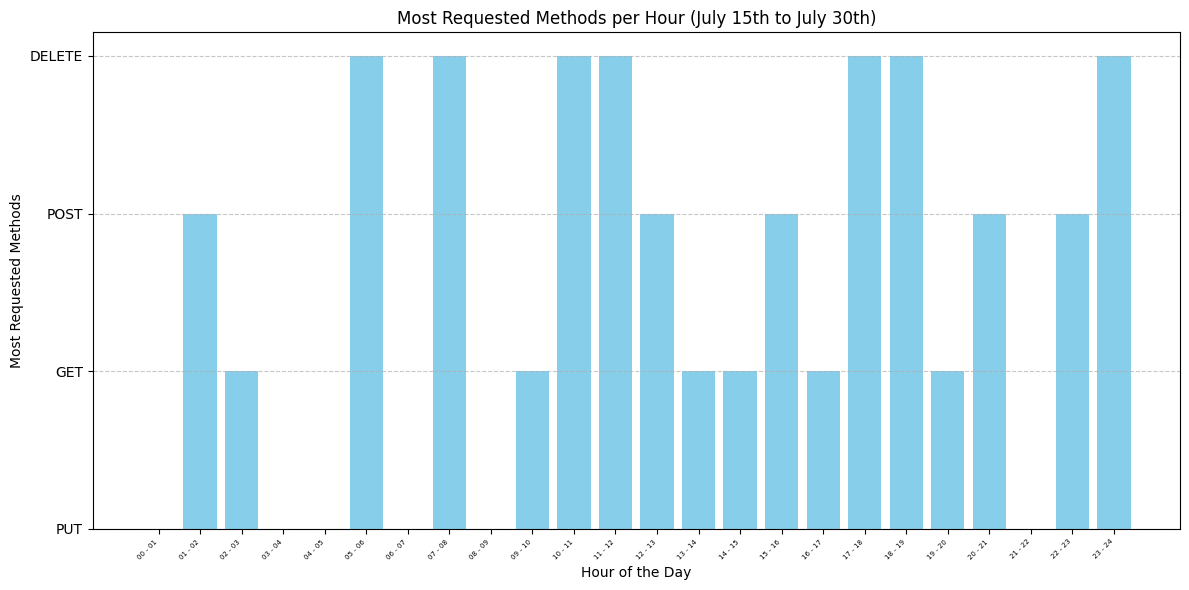

In [8]:
datetime_objects = [datetime.datetime.strptime(ts, '%d/%b/%Y:%H:%M:%S %z') for ts in time_stamps]

# Filter data within the specified date range (July 15th to July 30th)
start_date = datetime.datetime(2024, 6, 15, tzinfo=datetime.timezone.utc)
end_date = datetime.datetime(2024, 6, 30, tzinfo=datetime.timezone.utc)
filtered_data = [(method, dt) for method, dt in zip(request_methods, datetime_objects) if start_date <= dt <= end_date]

# Group requests by hour
hourly_counts = {}
for method, dt in filtered_data:
    hour = dt.hour
    if hour not in hourly_counts:
        hourly_counts[hour] = {}
    hourly_counts[hour][method] = hourly_counts[hour].get(method, 0) + 1

# Find the most requested URL endpoint for each hour
most_requested_per_hour = {hour: max(counts, key=counts.get) for hour, counts in hourly_counts.items()}

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(most_requested_per_hour.keys(), most_requested_per_hour.values(), color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Most Requested Methods')
plt.title('Most Requested Methods per Hour (July 15th to July 30th)')
plt.xticks(range(24),[f"{h:02} - {h+1:02}" for h in range(24)], rotation=45, ha='right', fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Now the let's see the requests per request methods distribution

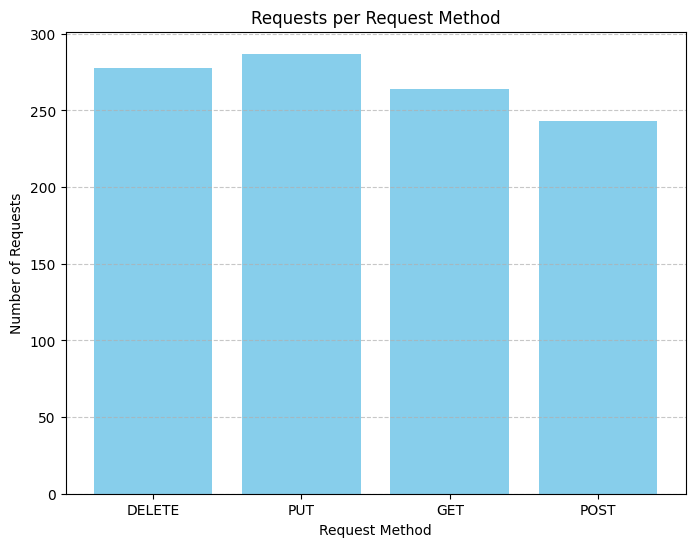

In [22]:
request_counts = {}
for req in request_methods:
   request_counts[req] = request_counts.get(req, 0) + 1

plt.figure(figsize=(8, 6))
plt.bar(request_counts.keys(), request_counts.values(), color='skyblue')
plt.xlabel('Request Method')
plt.ylabel('Number of Requests')
plt.title('Requests per Request Method')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### URL path counts

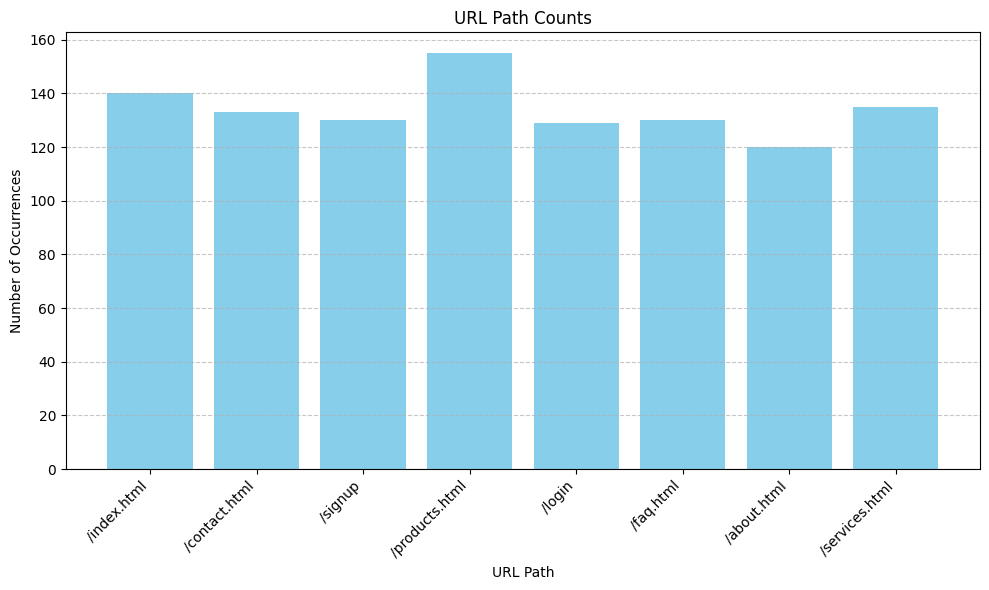

In [14]:
url_counts = {}
for path in url_paths:
    url_counts[path] = url_counts.get(path, 0) + 1

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(url_counts.keys(), url_counts.values(), color='skyblue')
plt.xlabel('URL Path')
plt.ylabel('Number of Occurrences')
plt.title('URL Path Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
